In [131]:
import numpy as np
import scipy as sp
from scipy.special import factorial

from numpy.typing._extended_precision import float128

In [4]:
def get_hermite_coef(n):

    a = np.zeros((n + 1, n + 2))
    a[0][0] = 1

    if n > 0:
        a[1][0] = 0
        a[1][1] = 2

    for h in range(1, n):
        for k in range(h + 2):
            if k == 0:
                a[h + 1][k] = -a[h][k + 1]
            else:
                a[h + 1][k] = 2 * a[h][k - 1] - (k + 1) * a[h][k + 1]

    coef = a[-1][:-1][::-1]

    return coef

def get_hermite_gauss_coef(n):

    a = np.zeros((n + 1, n + 2))
    a[0][0] = 1 / np.sqrt(np.sqrt(np.pi))

    if n > 0:
        a[1][0] = 0
        a[1][1] = 2 / np.sqrt(2 * np.sqrt(np.pi))

    for h in range(1, n):
        for k in range(h + 2):
            if k == 0:
                a[h + 1][k] = -a[h][k + 1] / np.sqrt(2 * (h + 1))
            else:
                a[h + 1][k] = (2 * a[h][k - 1] - (k + 1) * a[h][k + 1]) / np.sqrt(2 * (h + 1))

    coef = a[-1][:-1][::-1]

    return np.array(coef)

n_hermite = 30
h_coef = get_hermite_coef(n_hermite) / np.sqrt(np.power(2, n_hermite) * factorial(n_hermite) * np.sqrt(np.pi))
hg_coef = get_hermite_gauss_coef(n_hermite)
# print(h_coef)
# print(hg_coef)
print(np.max(np.absolute(h_coef - hg_coef)))

def clear_hermite(p):
    for k in range(len(p)):
        # print(p[k])
        if k % 2 == 1:
            p[k] = 0.0

    return p
p_cleared = np.array(clear_hermite([k for k in sp.special.hermite(n_hermite)]))
p_hh = p_cleared / np.sqrt(np.power(2, n_hermite) * sp.special.factorial(n_hermite) * np.sqrt(np.pi))
print(np.min(np.absolute(h_coef)), np.max(np.absolute(h_coef)))
print(np.absolute(h_coef - p_hh))

print(hg_coef)
print(p_hh)

1.4210854715202004e-14
0.0 69.27924526689436
[0.00000000e+00 0.00000000e+00 5.16987883e-26 0.00000000e+00
 9.26442286e-23 0.00000000e+00 3.79047244e-20 0.00000000e+00
 1.85669622e-18 0.00000000e+00 4.25007252e-17 0.00000000e+00
 1.08940634e-15 0.00000000e+00 1.83464355e-14 0.00000000e+00
 1.02584607e-13 0.00000000e+00 2.64677169e-13 0.00000000e+00
 2.41584530e-13 0.00000000e+00 1.49213975e-13 0.00000000e+00
 2.84217094e-13 0.00000000e+00 5.68434189e-14 0.00000000e+00
 1.95399252e-14 0.00000000e+00 6.10622664e-16]
[ 1.51123648e-12  0.00000000e+00 -3.28693935e-10 -0.00000000e+00
  3.10615769e-08  0.00000000e+00 -1.68250208e-06 -0.00000000e+00
  5.80463217e-05  0.00000000e+00 -1.34087003e-03 -0.00000000e+00
  2.12304422e-02  0.00000000e+00 -2.32018404e-01 -0.00000000e+00
  1.74013803e+00  0.00000000e+00 -8.79736448e+00 -0.00000000e+00
  2.90313028e+01  0.00000000e+00 -5.93822102e+01 -0.00000000e+00
  6.92792453e+01  0.00000000e+00 -3.99687953e+01 -0.00000000e+00
  8.56474186e+00  0.000000

In [142]:
def get_hermite_gauss_reccurrent(n, x):

    values = np.zeros((n + 1, len(x)))

    if n == 0:
        values[0] = np.exp(-0.5 * np.power(x, 2)) / np.sqrt(np.sqrt(np.pi))

    elif n == 1:
        values[0] = np.exp(-0.5 * np.power(x, 2)) / np.sqrt(np.sqrt(np.pi))
        values[1] = 2.0 * x * np.exp(-0.5 * np.power(x, 2)) / np.sqrt(2.0 * np.sqrt(np.pi))

    else:
        values[0] = np.exp(-0.5 * np.power(x, 2)) / np.sqrt(np.sqrt(np.pi))
        values[1] = 2.0 * x * np.exp(-0.5 * np.power(x, 2)) / np.sqrt(2.0 * np.sqrt(np.pi))

        for k in range(2, n + 1):
            values[k] = 1.0 / np.sqrt(2 * k) * (2 * x * values[k - 1] - np.sqrt(2 * (k - 1)) * values[k - 2])

    return values

In [43]:
n_hermite = 29
x_span = 60
n_x = 128
d_x = x_span / (n_x - 1)
x = np.array([d_x * k - x_span / 2 for k in range(n_x)])
hg_coef = get_hermite_gauss_coef(n_hermite)
hg_val = np.polyval(hg_coef, x) * np.exp(-0.5 * np.power(x, 2))

# h_coef = get_hermite_coef(n_hermite) / np.sqrt(np.power(2, n_hermite) * factorial(n_hermite) * np.sqrt(np.pi))
# h_val = np.polyval(h_coef, x) * np.exp(-0.5 * np.power(x, 2))

rec_val = get_hermite_gauss_reccurrent(n_hermite, x)

print(np.max(np.absolute(hg_val - rec_val[-1])))
# print(np.max(np.absolute(h_val - rec_val[-1])))

6.308067956872776e-11


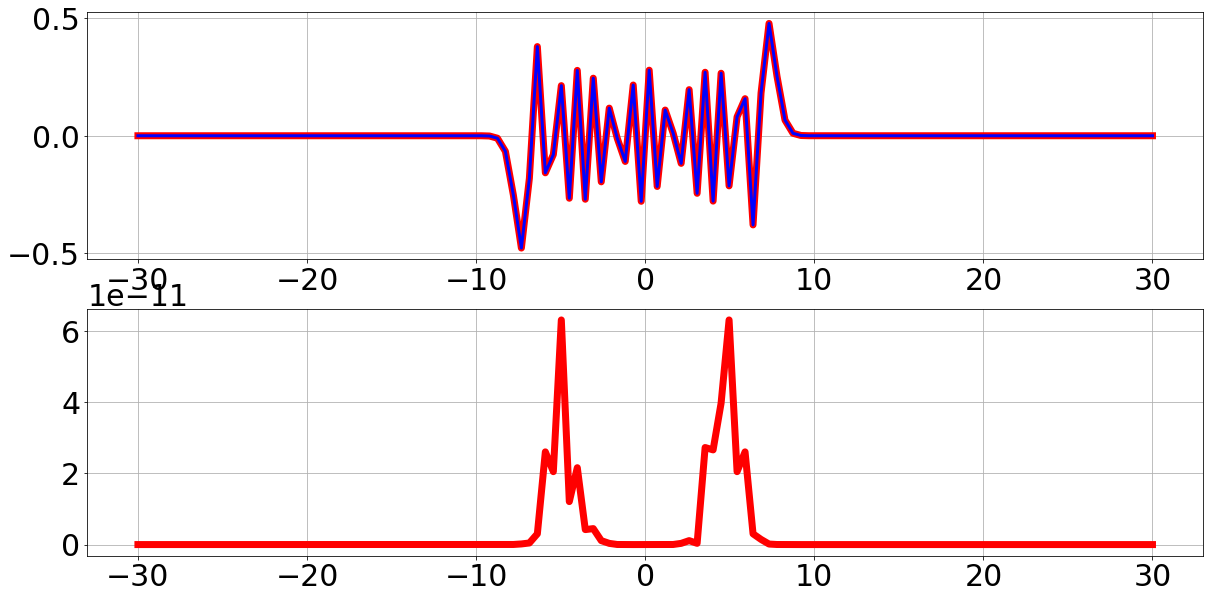

In [45]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams.update({'font.size': 30})
color = ['red', 'blue', 'green', 'xkcd:light purple', 'xkcd:cyan']
fig, axs = plt.subplots(2, 1, figsize=(20, 10))
axs[0].plot(x, hg_val, color[0], linewidth=7)
# axs[0].plot(x, h_val, color[2], linewidth=5)
axs[0].plot(x, rec_val[-1], color[1], linewidth=3)
axs[0].grid(True)
# axs[0].set_xlim(0, 1)
# axs[0].set_ylim(0, 1)

axs[1].plot(x, np.absolute(hg_val - rec_val[-1]), color[0], linewidth=7)
# axs[1].plot(x, np.absolute(h_val - rec_val[-1]), color[1], linewidth=4)
axs[1].grid(True)
# axs[1].set_xlim(0, 1)
# axs[1].set_ylim(0, 1)

In [50]:
import scipy.io as sio

psi_mat_file = sio.loadmat('../data/psi_matrix.mat')
xi_mat_file = sio.loadmat('../data/xi_values.mat')

In [51]:
print(sorted(psi_mat_file.keys()))
print(sorted(xi_mat_file.keys()))

['__globals__', '__header__', '__version__', 'psi_matrix']
['__globals__', '__header__', '__version__', 'xi']


In [81]:
psi_matrix = psi_mat_file['psi_matrix']
print(np.shape(psi_matrix))
xi_values = xi_mat_file['xi'].reshape((128))
print(np.shape(xi_values))
# print(xi_values)
test_psi = np.transpose(psi_matrix, (1, 0))
print(np.transpose(psi_matrix, (1, 0))[0])

(128, 32)
(128,)
[1.68394409e-141 3.86618576e-137 7.57811704e-133 1.26812902e-128
 1.81171182e-124 2.20972554e-120 2.30097074e-116 2.04553729e-112
 1.55248441e-108 1.00593666e-104 5.56464632e-101 2.62801621e-097
 1.05960026e-093 3.64736826e-090 1.07186655e-086 2.68921398e-083
 5.76014673e-080 1.05333199e-076 1.64444952e-073 2.19179212e-070
 2.49403026e-067 2.42285608e-064 2.00944933e-061 1.42282027e-058
 8.60095291e-056 4.43881085e-053 1.95573609e-050 7.35660445e-048
 2.36247979e-045 6.47712595e-043 1.51607304e-040 3.02957319e-038
 5.16852137e-036 7.52791533e-034 9.36066447e-032 9.93715750e-030
 9.00619219e-028 6.96857198e-026 4.60330672e-024 2.59608901e-022
 1.24995042e-020 5.13794600e-019 1.80305854e-017 5.40198860e-016
 1.38172317e-014 3.01725462e-013 5.62505048e-012 8.95291435e-011
 1.21653884e-009 1.41127312e-008 1.39771846e-007 1.18182147e-006
 8.53115034e-006 5.25759170e-005 2.76623874e-004 1.24255610e-003
 4.76503279e-003 1.56005290e-002 4.36050007e-002 1.04053529e-001
 2.11982

In [67]:
rec_val_xi = get_hermite_gauss_reccurrent(31, xi_values)

In [98]:
d_xi = (xi_values[1] - xi_values[0])
print(xi_values[-1] - xi_values[0] + d_xi)
print(xi_values[-1] - xi_values[0] )
print(d_xi * 128 / np.pi)


xi_test_span = 2 * np.pi * 8
n_xi_test = 128
d_xi_test = xi_test_span / n_xi_test
xi_test = np.array([-xi_test_span / 2 + d_xi_test * k for k in range(n_xi_test)])

50.900465767891134
50.50280587907948
16.202121465279347


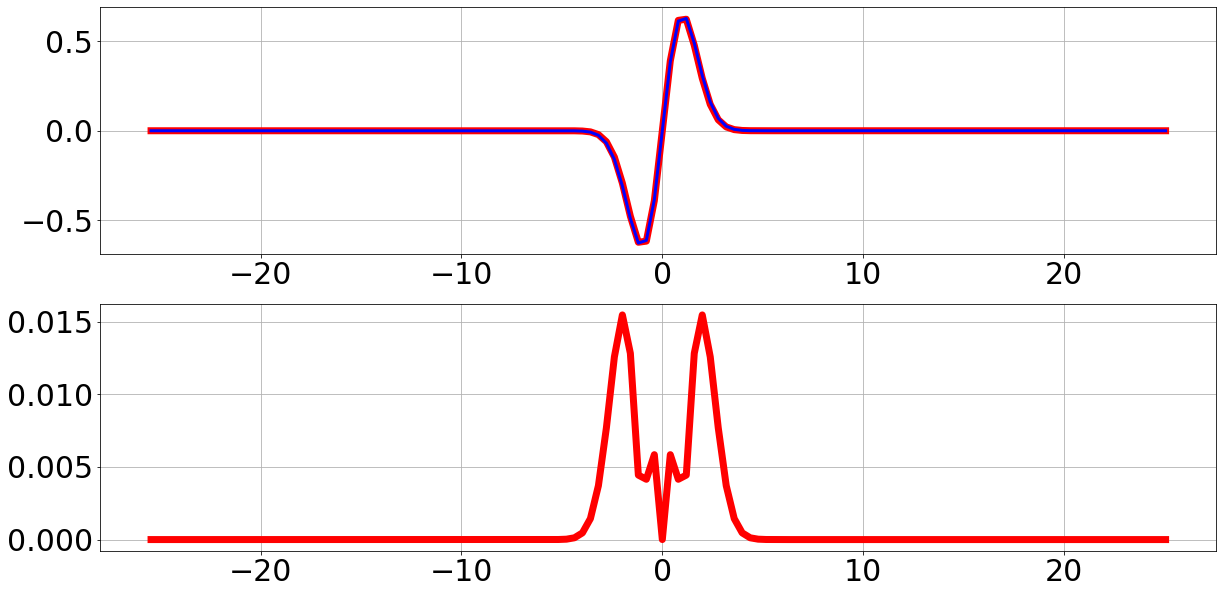

In [148]:
ind = 1
matplotlib.rcParams.update({'font.size': 30})
color = ['red', 'blue', 'green', 'xkcd:light purple', 'xkcd:cyan']
fig, axs = plt.subplots(2, 1, figsize=(20, 10))
axs[0].plot(xi_values, test_psi[ind], color[0], linewidth=7)
# axs[0].plot(x, h_val, color[2], linewidth=5)
axs[0].plot(xi_values, rec_val_xi[ind], color[1], linewidth=3)
axs[0].grid(True)
# axs[0].set_xlim(0, 1)
# axs[0].set_ylim(0, 1)

axs[1].plot(xi_values, np.absolute(test_psi[ind] - rec_val_xi[ind]), color[0], linewidth=7)
# axs[1].plot(x, np.absolute(h_val - rec_val[-1]), color[1], linewidth=4)
axs[1].grid(True)
# axs[1].set_xlim(0, 1)
# axs[1].set_ylim(0, 1)

In [113]:
t_sum = np.array([[1, 2, 3], [4, 5, 6], [-1, -2, -3]])
t_coef = np.array([2, 0, 1]).reshape((3, 1))
print(t_coef * t_sum)
print((t_coef * t_sum).sum(0))

[[ 2  4  6]
 [ 0  0  0]
 [-1 -2 -3]]
[1 2 3]


In [159]:
xi_test_span = 50
n_xi_test = 256
d_xi_test = xi_test_span / n_xi_test
xi_test = np.array([-xi_test_span / 2 + d_xi_test * k for k in range(n_xi_test)])

rec_val_xi = get_hermite_gauss_reccurrent(32, xi_test)

for k in range(32):
    integral = np.sum(rec_val_xi[k] * np.conj(rec_val_xi[k])) * (xi_test[1] - xi_test[0])
    print(k, integral, np.absolute(1.0 - integral))

0 0.9999999999999999 1.1102230246251565e-16
1 0.9999999999999999 1.1102230246251565e-16
2 1.0 0.0
3 1.0000000000000002 2.220446049250313e-16
4 1.0000000000000002 2.220446049250313e-16
5 1.0000000000000002 2.220446049250313e-16
6 1.0000000000000002 2.220446049250313e-16
7 1.0000000000000004 4.440892098500626e-16
8 1.0000000000000004 4.440892098500626e-16
9 1.0000000000000004 4.440892098500626e-16
10 1.0000000000000004 4.440892098500626e-16
11 1.0000000000000004 4.440892098500626e-16
12 1.0000000000000007 6.661338147750939e-16
13 1.0000000000000009 8.881784197001252e-16
14 1.0000000000000009 8.881784197001252e-16
15 1.0000000000000009 8.881784197001252e-16
16 1.0000000000000004 4.440892098500626e-16
17 1.0000000000000002 2.220446049250313e-16
18 1.0000000000000004 4.440892098500626e-16
19 1.0000000000000004 4.440892098500626e-16
20 1.0000000000000002 2.220446049250313e-16
21 1.0000000000000004 4.440892098500626e-16
22 1.000000000000001 1.1102230246251565e-15
23 1.0000000000000007 6.66133

In [168]:
errors = []
k_list = np.array([k for k in range(20, 32)])
n_xi_test_list = np.array([k for k in range(64, 256)])

for k in k_list:
    ints = []

    for n_xi_test in n_xi_test_list:

        xi_test_span = 50
        # n_xi_test = 256
        d_xi_test = xi_test_span / n_xi_test
        xi_test = np.array([-xi_test_span / 2 + d_xi_test * k for k in range(n_xi_test)])

        rec_val_xi = get_hermite_gauss_reccurrent(32, xi_test)

        integral = np.sum(rec_val_xi[k] * np.conj(rec_val_xi[k])) * (xi_test[1] - xi_test[0])
        ints.append(np.absolute(1.0 - integral))
            # print(k, integral, np.absolute(1.0 - integral))

    errors.append(np.array(ints))

errors = np.array(errors)
print(np.shape(errors))

(12, 192)


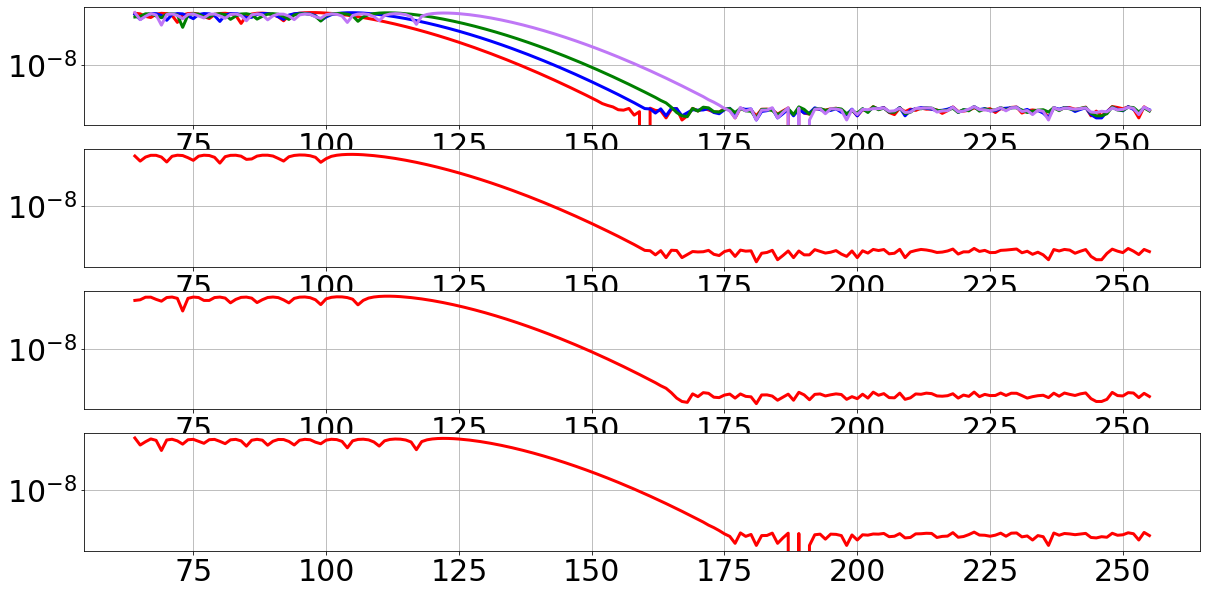

In [175]:
matplotlib.rcParams.update({'font.size': 30})
color = ['red', 'blue', 'green', 'xkcd:light purple', 'xkcd:cyan']
fig, axs = plt.subplots(4, 1, figsize=(20, 10))
plt_ind=0
axs[plt_ind].plot(n_xi_test_list, errors[0], color[0], linewidth=3) # 20 order
axs[plt_ind].plot(n_xi_test_list, errors[3], color[1], linewidth=3)
axs[plt_ind].plot(n_xi_test_list, errors[6], color[2], linewidth=3)
axs[plt_ind].plot(n_xi_test_list, errors[11], color[3], linewidth=3)
axs[plt_ind].grid(True)
axs[plt_ind].set_yscale('log')

plt_ind += 1
axs[plt_ind].plot(n_xi_test_list, errors[3], color[0], linewidth=3)
axs[plt_ind].grid(True)
axs[plt_ind].set_yscale('log')

plt_ind += 1
axs[plt_ind].plot(n_xi_test_list, errors[6], color[0], linewidth=3)
axs[plt_ind].grid(True)
axs[plt_ind].set_yscale('log')

plt_ind += 1
axs[plt_ind].plot(n_xi_test_list, errors[11], color[0], linewidth=3)
axs[plt_ind].grid(True)
axs[plt_ind].set_yscale('log')

In [154]:
xi_test_span2 = 50
n_xi_test2 = 256
d_xi_test2 = xi_test_span2 / n_xi_test2
xi_test2 = np.array([-xi_test_span2 / 2 + d_xi_test2 * k for k in range(n_xi_test2)])

rec_val_xi2 = get_hermite_gauss_reccurrent(32, xi_test2)

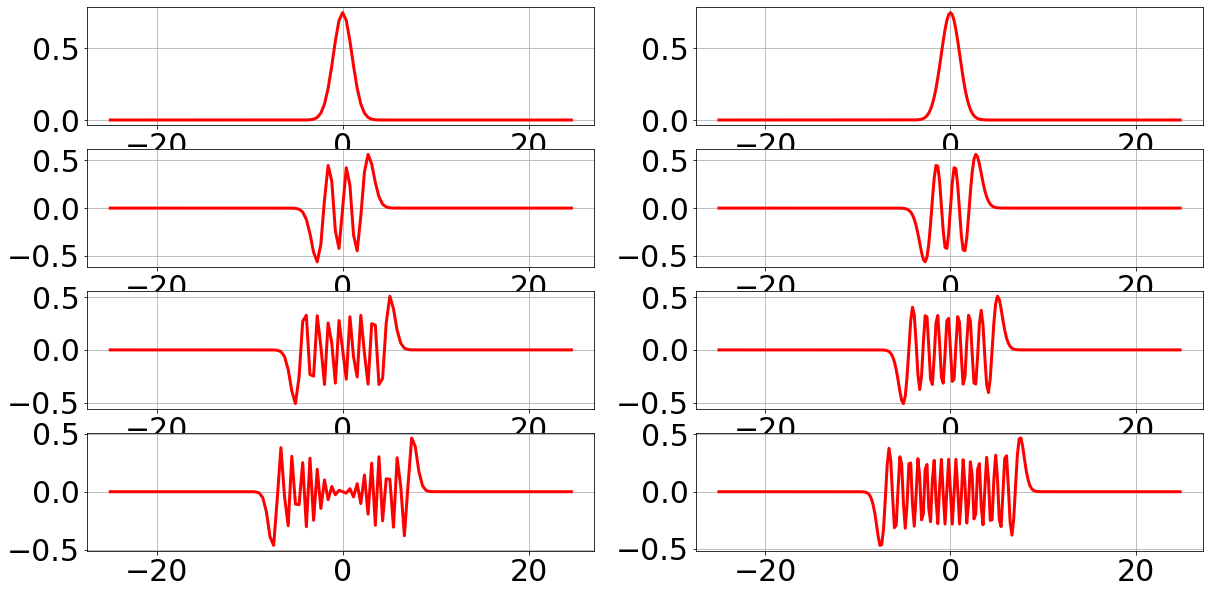

In [158]:
ind = 1
matplotlib.rcParams.update({'font.size': 30})
color = ['red', 'blue', 'green', 'xkcd:light purple', 'xkcd:cyan']
fig, axs = plt.subplots(4, 2, figsize=(20, 10))
plt_ind = 0
axs[plt_ind][0].plot(xi_test, rec_val_xi[0], color[0], linewidth=3)
axs[plt_ind][0].grid(True)
axs[plt_ind][1].plot(xi_test2, rec_val_xi2[0], color[0], linewidth=3)
axs[plt_ind][1].grid(True)

plt_ind = 1
axs[plt_ind][0].plot(xi_test, rec_val_xi[5], color[0], linewidth=3)
axs[plt_ind][0].grid(True)
axs[plt_ind][1].plot(xi_test2, rec_val_xi2[5], color[0], linewidth=3)
axs[plt_ind][1].grid(True)
plt_ind = 2
axs[plt_ind][0].plot(xi_test, rec_val_xi[15], color[0], linewidth=3)
axs[plt_ind][0].grid(True)
axs[plt_ind][1].plot(xi_test2, rec_val_xi2[15], color[0], linewidth=3)
axs[plt_ind][1].grid(True)
plt_ind = 3
axs[plt_ind][0].plot(xi_test, rec_val_xi[31], color[0], linewidth=3)
axs[plt_ind][0].grid(True)
axs[plt_ind][1].plot(xi_test2, rec_val_xi2[31], color[0], linewidth=3)
axs[plt_ind][1].grid(True)